In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import zipfile
import plotly.express as px
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sklearn.metrics as metrics
#from jupyterthemes import jtplot

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cerDF = pd.read_csv('/content/drive/MyDrive/Datasets/cervical_cancer.csv')
cerDF

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
cerDF.info()
#cerDF.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
#cerDF.describe()


# DEALING WITH MISSING VALUES

In [6]:
#Filling missing values with 'NaN'
#cerDF =  cerDF.replace({'?',np.NaN}, inplace = False)
cerDF =  cerDF.replace('?',np.NaN)
cerDF

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [7]:
cerDF.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

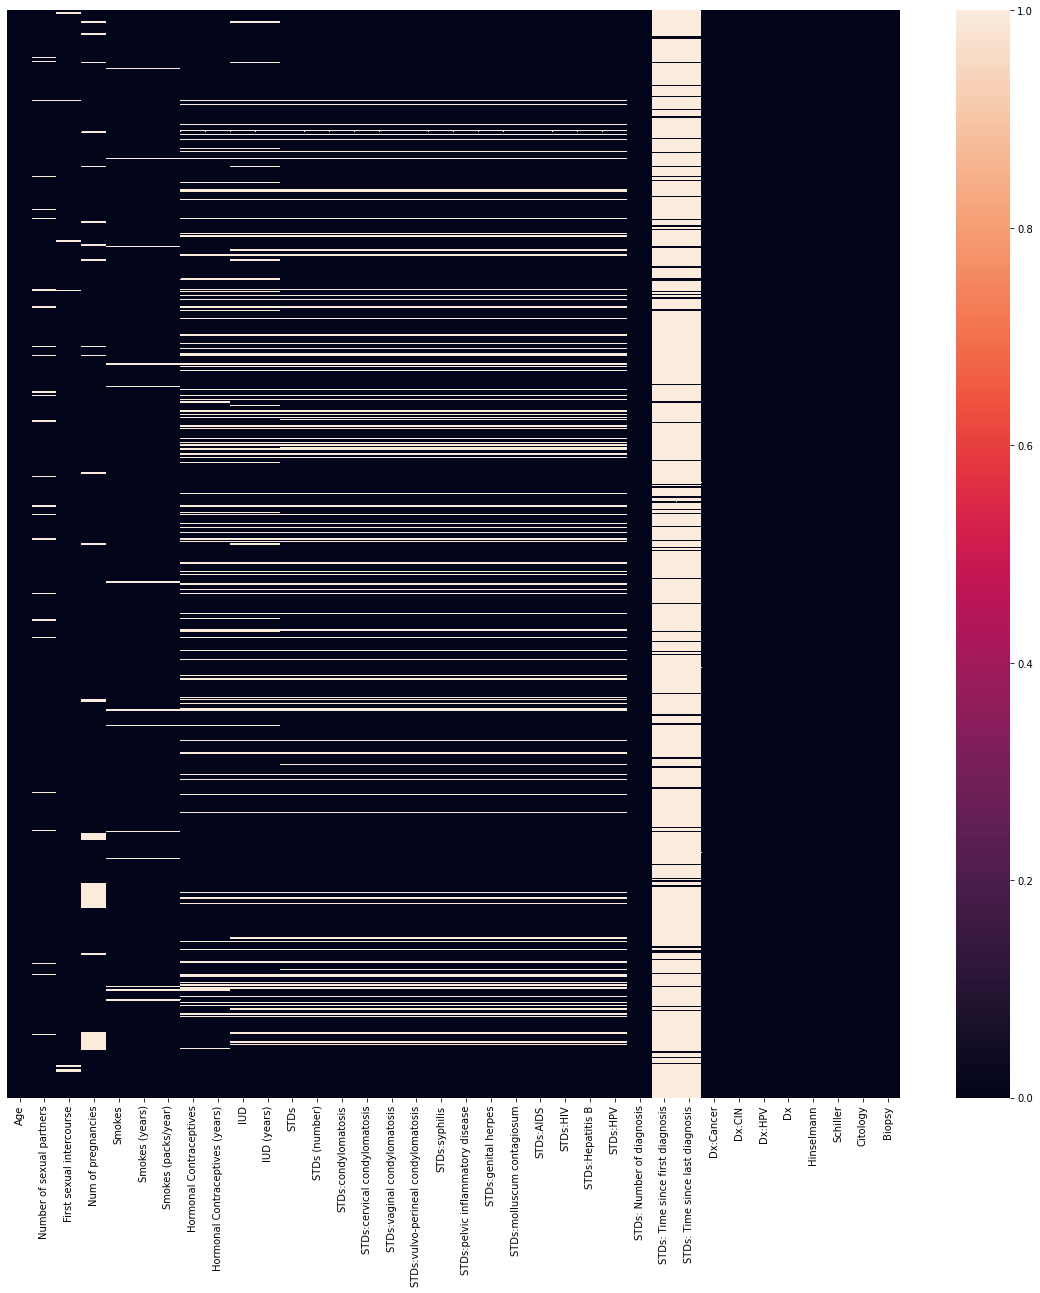

In [8]:
#Plotting the heat map to visualize the number of missing values
#Fig ,ax = plt.subplots(figsize = (20,20))
plt.figure(figsize = (20,20))
sns.heatmap(cerDF.isnull(), yticklabels = False)
#plt.show()

In [9]:
cerDF =  cerDF.apply(pd.to_numeric)
#cerDF.dtypes
cerDF.shape

(858, 36)

In [10]:
#from IPython.display import display
cerDF = cerDF.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis = 1)


In [11]:
cerDF.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [12]:
cerDF = cerDF.fillna(cerDF.mean())
cerDF

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
854,32,2.0,19.0000,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
855,25,2.0,17.0000,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
856,33,2.0,24.0000,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0


# **Applying the heat map to visualize and check out data cleaning** 

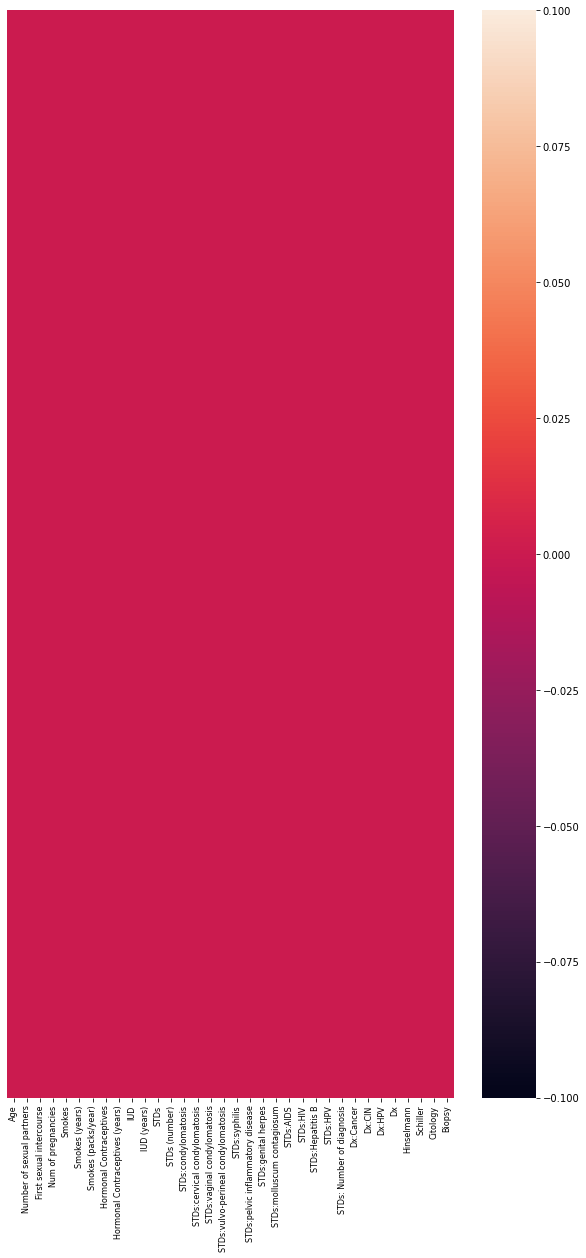

In [13]:
#Fig, ax= plt.subplots(figsize = (10,15))
#sns.heatmap(cerDF)
plt.figure(figsize = (10,20))
sns.heatmap(cerDF.isnull(), yticklabels = False)
plt.xticks(rotation = 90) #default ne
plt.tick_params(labelsize = 8)

# IT IS EVIDENT THAT THERE IS NO MORE MISSING OR NULL VALUES

In [14]:
cerDF.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,0.002656,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399325,0.350189,4.057885,2.209657,0.448671,3.519082,0.293260,...,0.048244,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The age range for people involved in the study is (13,84)

Performing data VISUALIZATION

In [15]:
#We will observe the corellation between different features in our datasets
cerDF_matrix = cerDF.corr()
display(cerDF_matrix)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.084896,0.369168,0.526137,0.055813,0.217349,0.131180,0.065624,0.277181,0.267662,...,0.038546,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.084896,1.000000,-0.147937,0.076719,0.238078,0.177117,0.175153,0.006342,0.018552,0.030005,...,0.013871,0.051559,0.022309,0.015691,0.027264,0.022982,-0.039273,-0.008899,0.021839,-0.001429
First sexual intercourse,0.369168,-0.147937,1.000000,-0.058223,-0.123602,-0.058366,-0.056332,0.018344,0.008000,-0.020975,...,0.033112,-0.013327,0.067283,-0.032626,0.043966,0.035750,-0.016546,0.003493,-0.010971,0.007262
Num of pregnancies,0.526137,0.076719,-0.058223,1.000000,0.080768,0.174912,0.097044,0.142858,0.207839,0.198550,...,-0.028162,0.033514,0.035123,0.007344,0.046753,0.019025,0.038685,0.087687,-0.029656,0.043460
Smokes,0.055813,0.238078,-0.123602,0.080768,1.000000,0.723128,0.493361,-0.002165,0.044157,-0.051184,...,0.049171,0.095433,-0.011027,-0.042822,0.012210,-0.067614,0.034527,0.053613,-0.003913,0.029091
Smokes (years),0.217349,0.177117,-0.058366,0.174912,0.723128,1.000000,0.724116,-0.011002,0.048899,0.027562,...,0.050935,0.081676,0.054674,-0.030966,0.057214,-0.048894,0.071232,0.094640,-0.006750,0.061484
Smokes (packs/year),0.131180,0.175153,-0.056332,0.097044,0.493361,0.724116,1.000000,0.005880,0.040112,0.007891,...,-0.008410,0.032186,0.108476,-0.021127,0.110366,-0.033358,0.026662,0.017954,0.004613,0.024657
Hormonal Contraceptives,0.065624,0.006342,0.018344,0.142858,-0.002165,-0.011002,0.005880,1.000000,0.448574,0.033729,...,0.039040,-0.050660,0.026407,-0.003334,0.038038,-0.001723,0.033551,-0.004247,-0.011030,0.007711
Hormonal Contraceptives (years),0.277181,0.018552,0.008000,0.207839,0.044157,0.048899,0.040112,0.448574,1.000000,0.094953,...,0.052059,-0.037219,0.054627,0.003086,0.061394,-0.012865,0.038825,0.078707,0.074324,0.078995
IUD,0.267662,0.030005,-0.020975,0.198550,-0.051184,0.027562,0.007891,0.033729,0.094953,1.000000,...,-0.018574,0.029871,0.110541,0.051833,0.058154,0.138905,0.044059,0.084074,0.007348,0.051554


Drawing the heatmap for correlation matrix

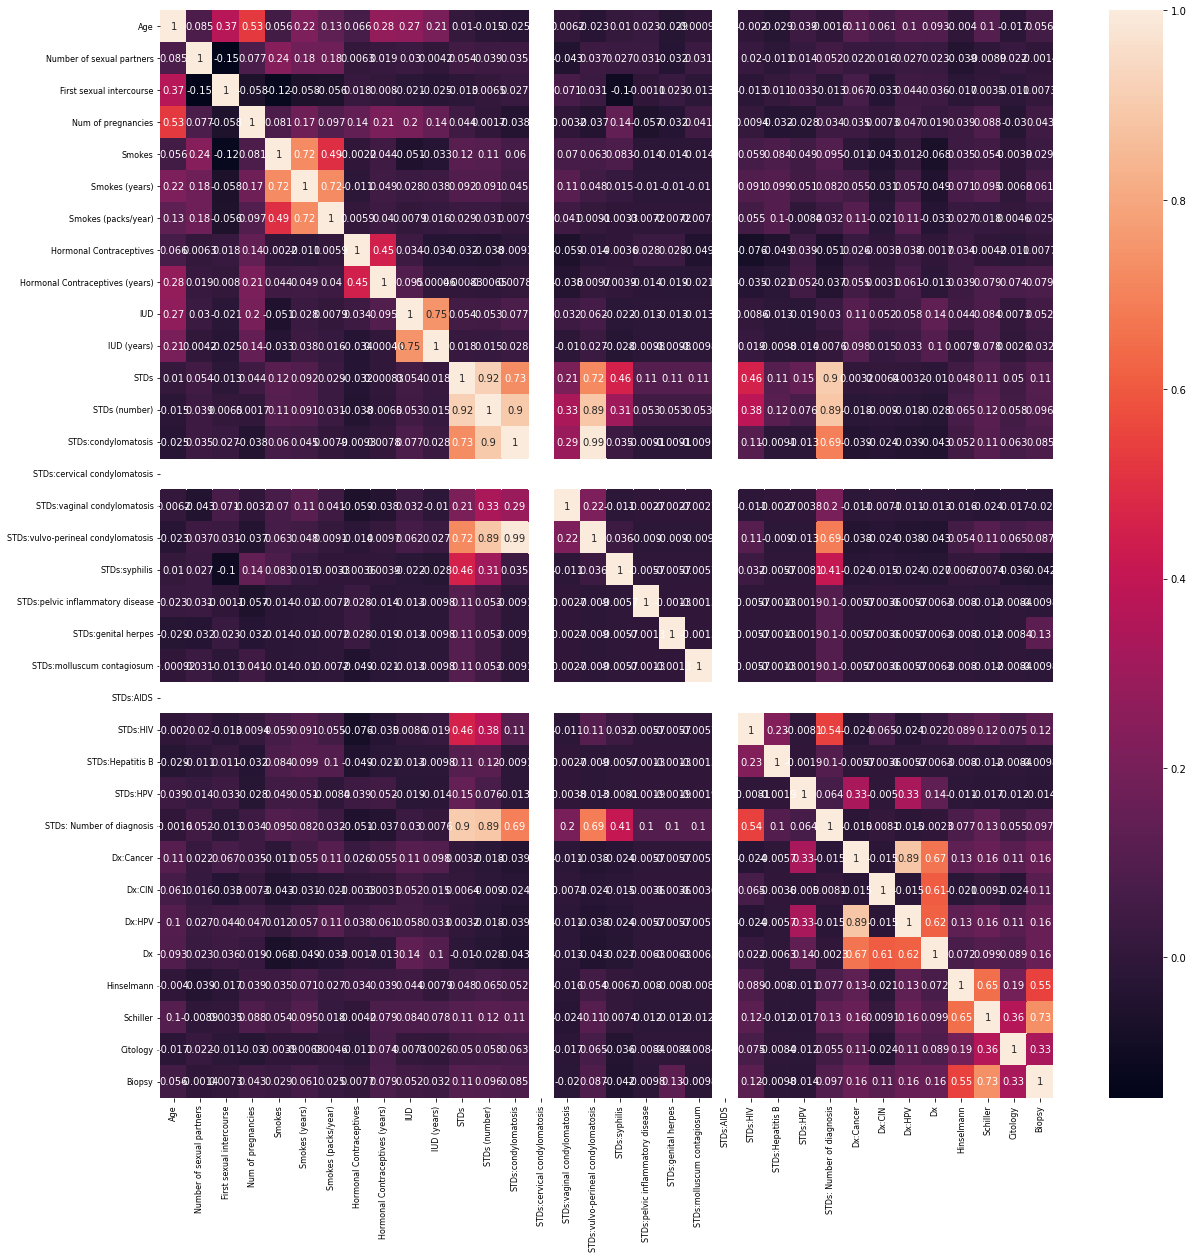

In [16]:
Fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(cerDF_matrix, annot = True)
plt.xticks(rotation = 90)
plt.yticks(rotation = 360)
plt.tick_params(labelsize = 8)

VISUALIZING THE WHOLE DATAFRAME BY DRAWING A HISTOGRAM

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21969a07c0>,
      dtype=object)

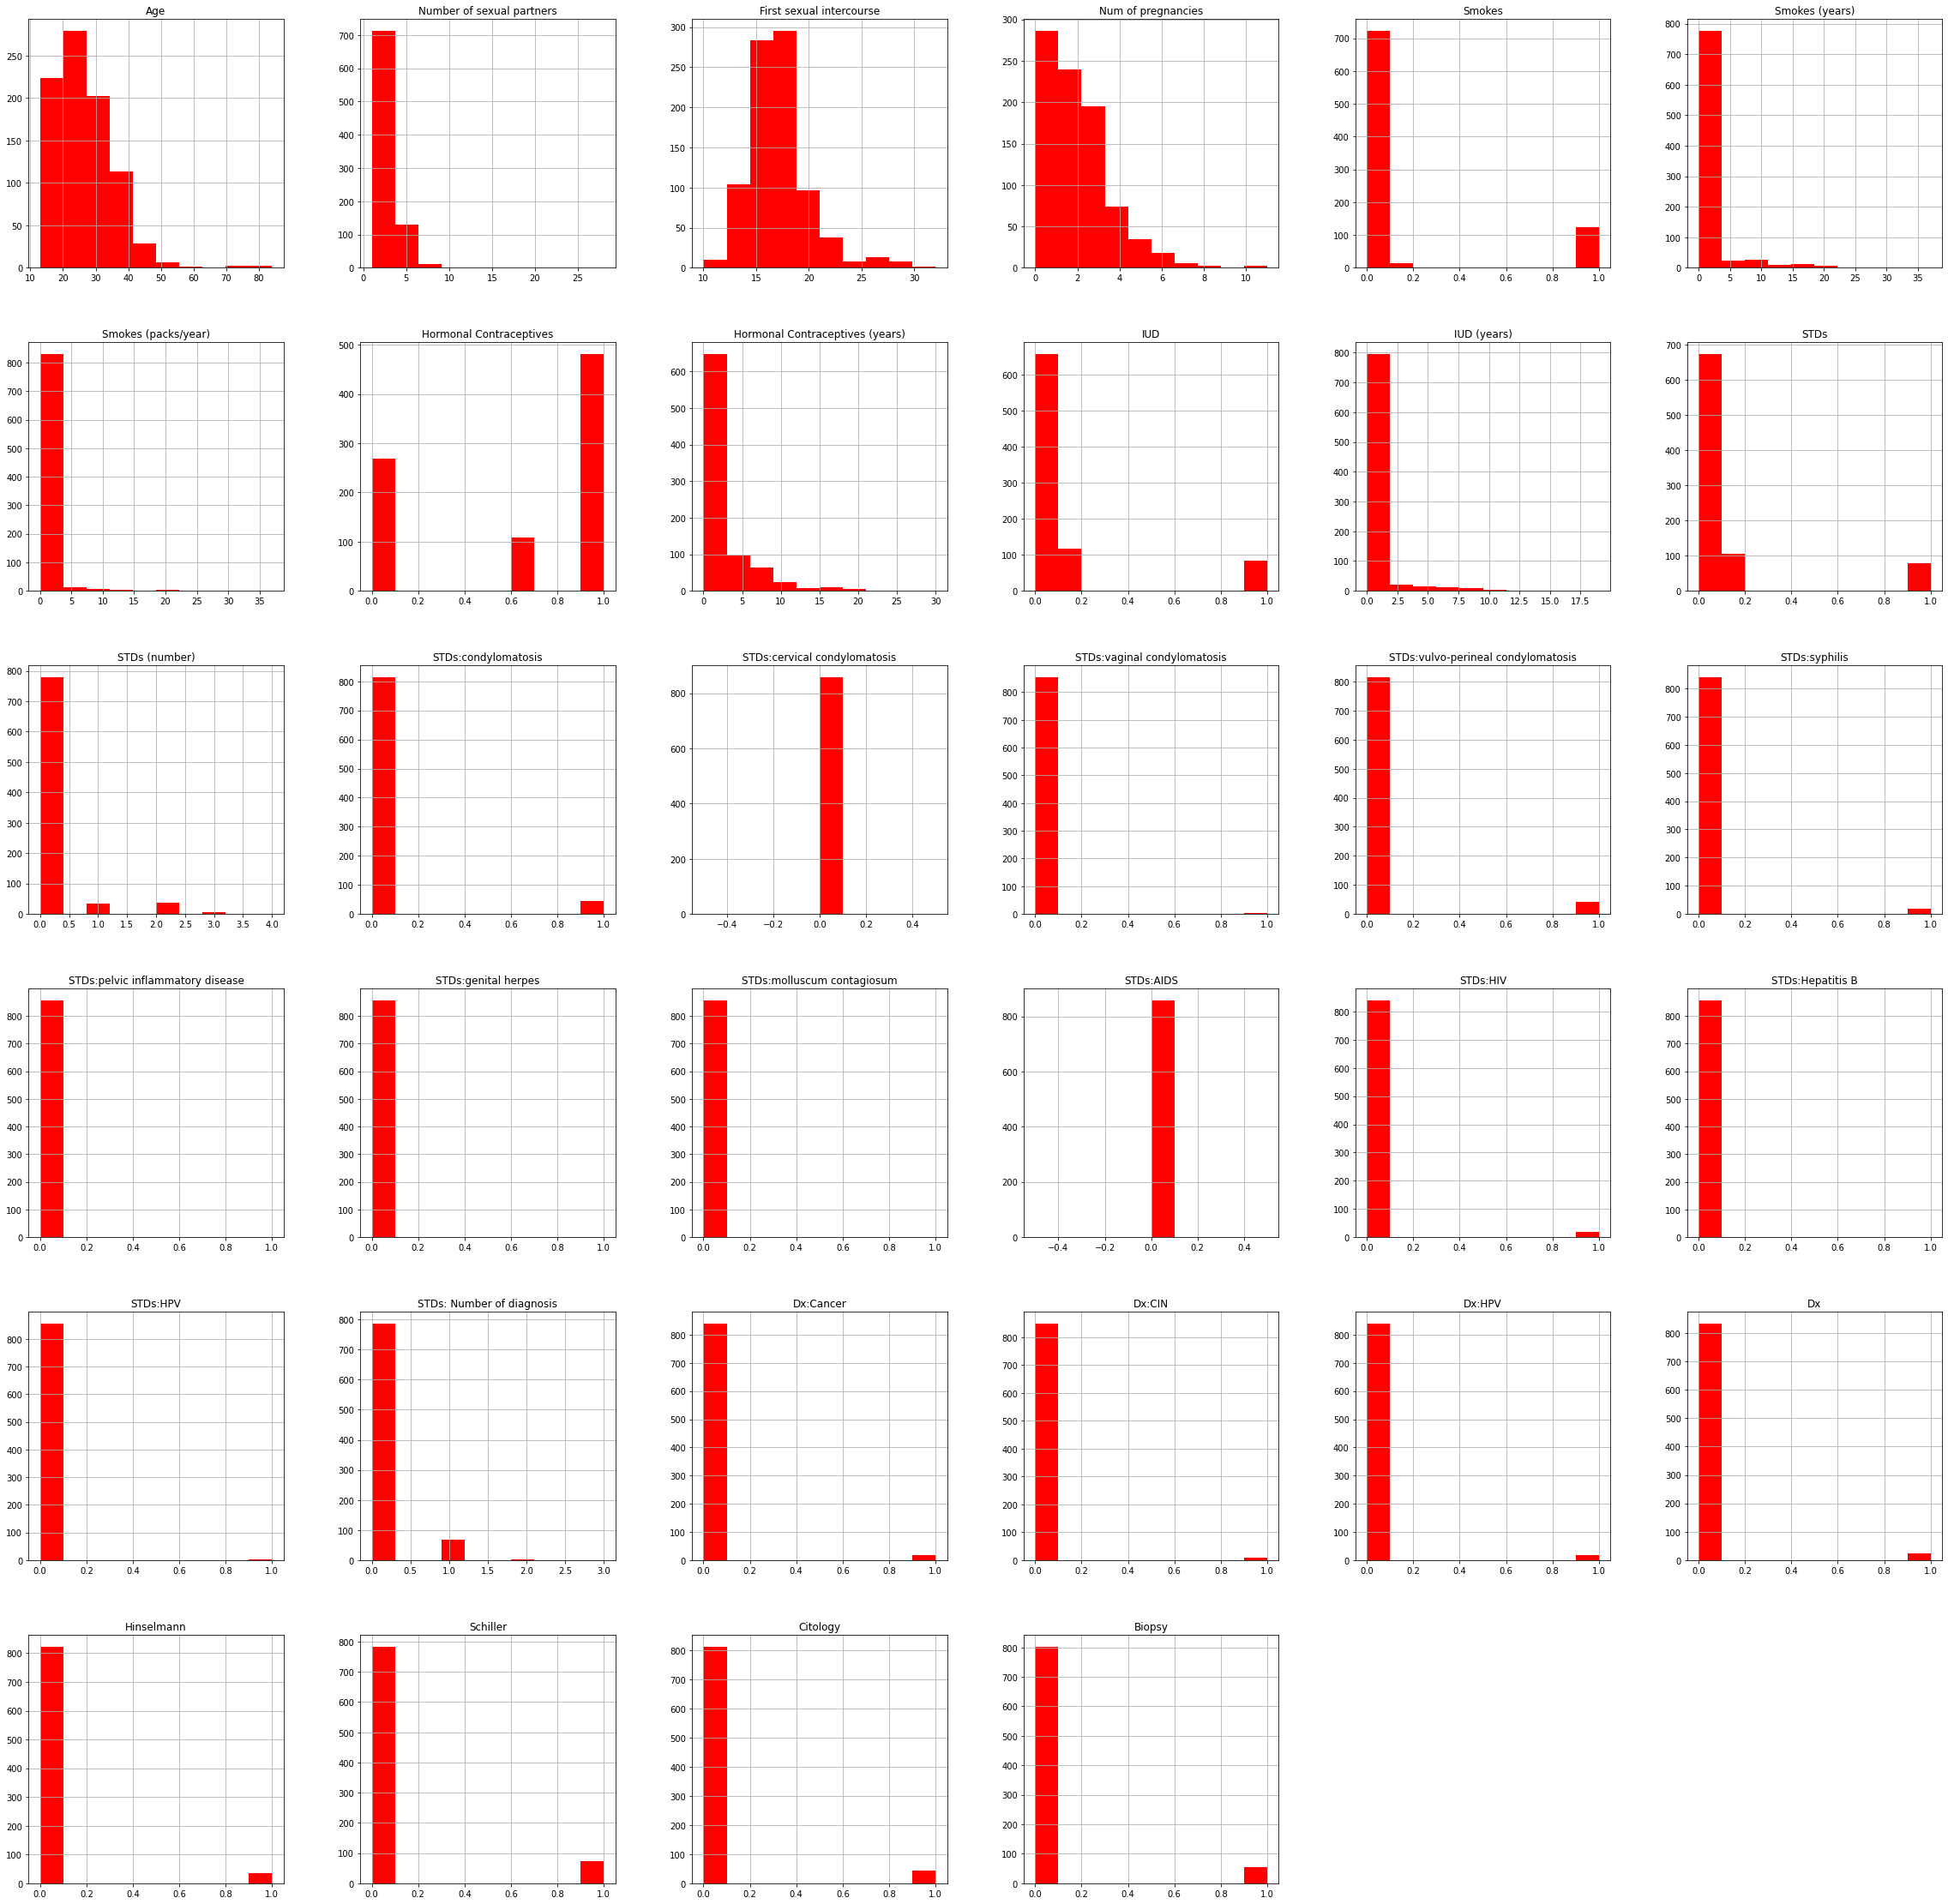

In [17]:
#Fig, ax = plt.subplots(figsize = (30,30))
cerDF.hist(bins = 10, color = 'red', figsize = (40,40))


Text(0, 0.5, 'Number')

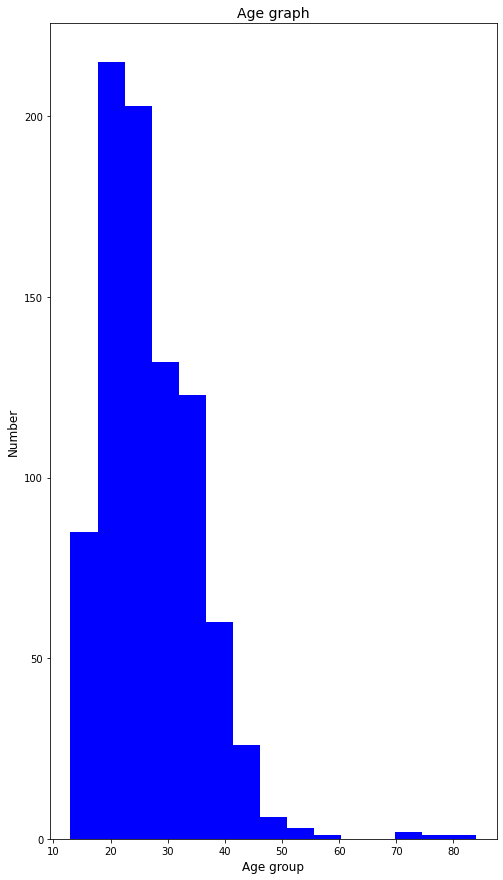

In [ ]:
#plotting a histogram for individual variables i.e., Age
Fig, ax = plt.subplots(figsize = (8,15))
plt.hist(cerDF.Age, bins = 15, color = 'blue')
#plt.bar(cerDF.Age, cerDF.Smokes, color = 'blue', width = 0.7) #Cannot use bar because you need two directions (x,y).
plt.title('Age graph', fontsize = 14)
plt.xlabel('Age group',  fontsize = 12)
plt.ylabel('Number',  fontsize = 12)

PREPARING THE DATA BEFORE TRANING

In [19]:
#We select the biopsy as our label class
X = cerDF.iloc[:,0:33]
Y = cerDF.loc[:,['Biopsy']]
Y


,Biopsy
0,0
1,0
2,0
3,0
4,0
...,...
853,0
854,0
855,0
856,0


We want to perform feature selection to determine the top relevant features.

In [20]:
fitt = SelectKBest(score_func = chi2, k = 'all')
fitt.fit(X,Y)
TabelScores = pd.DataFrame(fitt.scores_)
TabelFeatures = pd.DataFrame(X.columns)
GeneralTable = pd.concat([TabelFeatures,TabelScores], axis = 1)
GeneralTable.columns = ['Features', 'scores']
#GeneralTable

In [21]:
#We want to sort the table according to best performing features
GeneralTable.sort_values(by = 'scores', ascending = False)
#GeneralTable

,Features,scores
31,Schiller,421.468937
30,Hinselmann,246.624266
32,Citology,87.288667
5,Smokes (years),43.736538
8,Hormonal Contraceptives (years),29.350855
28,Dx:HPV,21.747945
26,Dx:Cancer,21.747945
29,Dx,20.716438
19,STDs:genital herpes,12.641836
12,STDs (number),12.449041


From the table above, the most informative features are presented in a top down approach. It can also be said that the features with the most dependencies on the class label are presented top-**down**

NOW WE BUILD A MODEL

In [83]:
#We will use only a selected top features
#x_target = cerDF[['Schiller','Hinselmann','Citology', 'Smokes (years)','Hormonal Contraceptives (years)','Dx:HPV','Dx:Cancer', 'Dx', 'STDs:genital herpes', 'STDs (number)']]
x_target = cerDF.iloc[:,0:33]
y_label = cerDF.loc[:,['Biopsy']]
x_target.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [84]:
# the data types are not all of the same types. we need to smoothen it
x = np.array(x_target).astype('float32')
y = np.array(y_label).astype('float32')

y = y.reshape(-1,1)

In [85]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)
#x_train, x_test, y_train, x_test = train_test_split(x, y, test_size = 0.2)

In [87]:
#We first try the XGBClassifier classifier
model = XGBClassifier()
model.fit(x_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [88]:

#NOW WE EVALUATE THE MODEL USING XGB
#first we see the accuracy on out training data
result_train = model.score(x_train, y_train)
result_train*100


98.83381924198251

In [89]:
#Now we check the performance of our model on the test data
result_test = model.score(x_test, y_test)
result_test*100

93.02325581395348

In [90]:
#Now we perform a prediction
result_pred = model.predict(x_test)
#result_pred
print(accuracy_score(y_test, result_pred)*100)

93.02325581395348


In [91]:
#we then perform a classification report using a confusion matrix
print(classification_report(y_test, result_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       164
         1.0       0.25      0.25      0.25         8

    accuracy                           0.93       172
   macro avg       0.61      0.61      0.61       172
weighted avg       0.93      0.93      0.93       172



Text(69.0, 0.5, 'TryY')

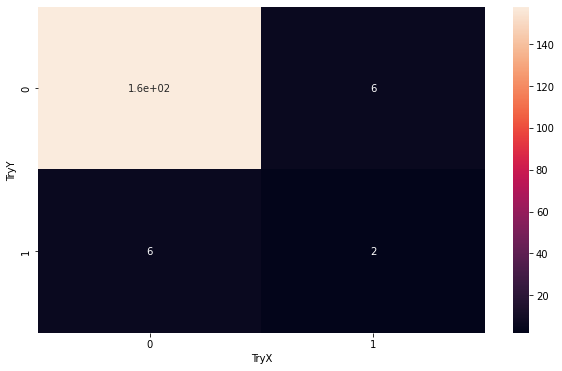

In [99]:
#then the confusion matrix
Fig, ax = plt.subplots(figsize = (10,6))
cm = confusion_matrix(y_test, result_pred)
np.set_printoptions(precision = 3)
sns.heatmap(cm, annot = True)
#np.around(cm, decimals = 2)
plt.xlabel('TryX')
plt.ylabel('TryY')


## WE TRIED USING OTHER CLASSIFIERS OTHER THAN THE XGBOOST

In [ ]:
#Then we try the Random Forest
'''model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train,y_train)

#NOW WE EVALUATE THE MODEL USING RF
y_pred = model.predict(x_test)
print(accuracy_score(y_pred, y_test)*100)'''

In [ ]:
#Now we check to see our trained model's performance on our test data set
'''result = model.score(x_test, y_test)
result*100'''

In [ ]:
#WE ALSO WANT TO TRY THE KNN CLASSIFIER
'''model = KNeighborsClassifier(n_neighbors = 5)
model.fit(x_train, y_train)'''


In [ ]:
'''resul_pred = model.predict(x_test)
accuracy_score(resul_pred, y_test)
result = model.score(x_test, y_test)
result*100'''

92.44186046511628